# Jupyter Introducció

In [3]:
import pandas as pd

In [8]:
data_frame = pd.read_csv('iris.csv')

In [10]:
data_frame

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


## Accedemos a los registros 0, 1 y 6 del atributo "Sepal Length"

In [12]:
data_frame.loc[[0,1,6],['Sepal.Length']]

,Sepal.Length
0,5.1
1,4.9
6,4.6


## Estadísticos Resumen de la tabla

In [13]:
data_frame.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Modelo de regresión

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.linear_model import LinearRegression

In [23]:
# seleccionamos las columnas que queremos estudiar
df = data_frame[['Petal.Length','Petal.Width']] 

In [19]:
# establecemos que el 20% de los datos de muestra se utilicen para testear el modelo y el 80% restante para entrenarlo. 
# random_state=42 es el parámetro que sirve como semilla generadora de números aleatorios, para dividir los datos, podríamos establecer otro número
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) 

In [24]:
df_copy = train_set.copy()

In [33]:
# el coeficiente de correlación es 0.96, esto indica una correlación positiva muy fuerte y que las variables servirían para un modelo
df_copy.corr()

,Petal.Length,Petal.Width
Petal.Length,1.000000,0.962577
Petal.Width,0.962577,1.000000


## Graficamos

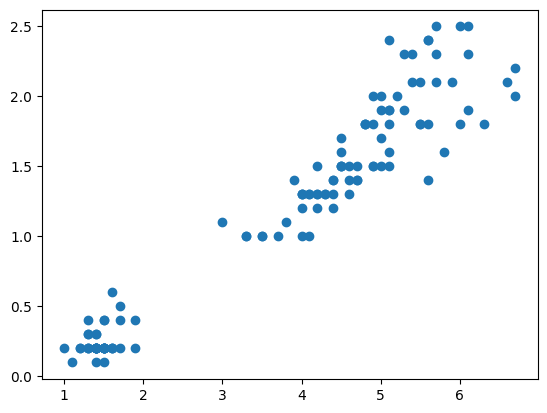

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df_copy['Petal.Length'], df_copy['Petal.Width']) #definimos eje x e y

In [39]:
# eliminamos la columna (axis=1) Petal.Width, para entrenar el modelo sólo con la columna Petal.Length
train_set_x = df_copy.drop(['Petal.Width'], axis=1)
# train_set_label contiene los valores que queremos predecir
train_set_label = df_copy['Petal.Width']

In [40]:
# creamos modelo de regresión linear
lin_reg = LinearRegression()
#con el método fit entrenamos el modelo
lin_reg.fit(train_set_x, train_set_label)

LinearRegression()

In [41]:
# obtenemos los coeficientes del modelo
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [0.41323829]
Intercept:  -0.35666804105655303


Petal.width =0.4132*Petal.Length - 0.3566

In [48]:
import numpy as np

single_feature_value = 4  # El valor que queremos predecir
single_feature_array = np.array(single_feature_value).reshape(-1, 1) #el valor que queremos predecir en una matriz de 1x1

#Esto es necesario porque la función predict de scikit-learn espera que la entrada sea un array 2D (matriz) 
# donde cada fila es una muestra y cada columna es una característica.

# Realizamos la predicción
prediction = lin_reg.predict(single_feature_array)
print(prediction)

[1.29628513]


C:\Users\mica_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
